# Assignment 7


You will demonstrate your ability to create and train Neural Network models.

You will *only* use `Dense` layers.

# Objectives

This is a "doing" rather than "thinking" assignment.

Your goal is to checkpoint your skills to see if they are sufficient to create, train, and evaluate
Neural Network models.

# Submission guidelines

There are some specified tasks you must carry out, which involve playing around with a number of models.

We want to be able to evaluate *your best model* on a holdout dataset.

To faciliate this,
in addition to providing your notebook, we will ask you to create the subroutine `MyModel`
described below **and submit one additional file** to be described.

You will choose your *best model* and using the code provided in the cell below, save the model to a file and **submit the file with your saved model** along with the notebook.

The code cell below **should be the last cell in your notebook**.

The last cell:
- defines a routine to save a "model" object to a file
- defines a routine to load a model object from a file
- asks you to save the model for one of the tasks
- asks you to run `MyModel`

`MyModel` takes as arguments
- a test set: `x_test`, `y_test`
- name of a file containing a model object for a specified task

`MyModel` will load the file (i.e., restore the model) and run predictions on the test set.

You will need to complete the body of the `MyModel` definition.

We will run `MyModel` in that cell in order to load your saved model and run it
- We will not run any other cell in the notebook so if you need imports or anything else. put it there!  
- We **will not** run cells that train your model: that would take too long)
- If you need the holdout data to be transformed
    - the transformations should be called from `MyModel`
    - we will not run a cell to make the transformation happen

# HINT
**This is literally a give-away:** https://www.tensorflow.org/tutorials/keras/classification

## Additional submission

In addition to your notebook, please also submit the file whose name is stored in `model_path`.

**DO NOT** rename the file!


# The problem

You will create several Neural Networks to solve a classification problem that is a slight variant
of the MNIST digit classification problem.

The assignment really involves little more than playing around with that example.

The objective is to ensure that you are able to write and run simple programs using Keras.

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [1]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


2023-04-11 23:43:40.539189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)


2.10.0


In [3]:
# Set the results to be fixed at each time
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Look at the dimension for "x_train", "y_train", "x_test", and "y_test"
x_train.shape

(60000, 28, 28)

In [5]:
len(y_train)


60000

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
len(y_test)

10000

In [8]:
# Look at the labels for each instance
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# Assign the actual names for each label 0-9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


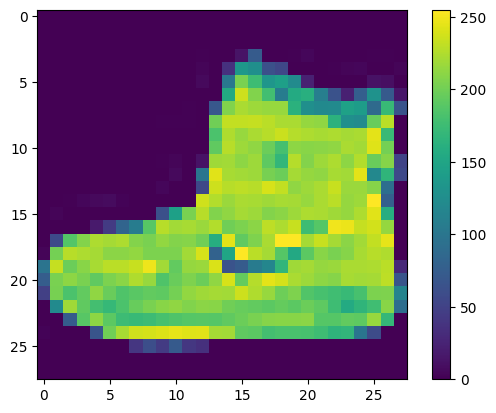

In [10]:
# Preprocessing befor the task
## Check the first image in "x_train"
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
## Rearraging 0-255 to 0-1 by dividing "x_train" and "x_test" by 255.0
x_train = x_train / 255.0

x_test = x_test / 255.0

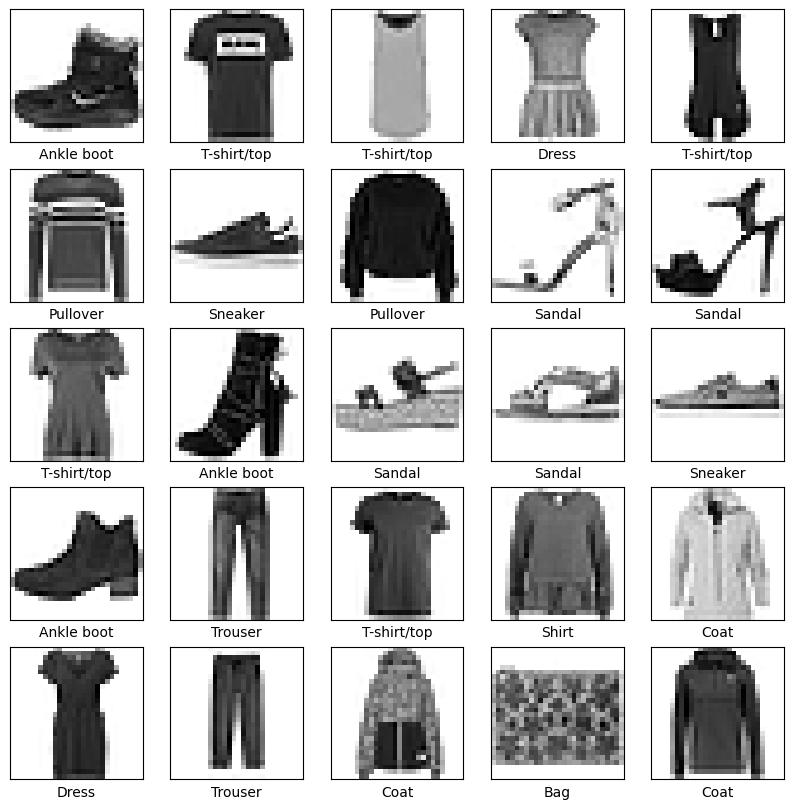

In [12]:
## Show first 25 images to prove the format is correct and we are ready to build our neural network task
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Tasks

For each task
- create the Neural Network as specified
- train it on the training data set
- evaluate it on the test data set


## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

In [13]:
# Step 1: Build the one layer Neural Network
## Here we apply the the softmax function to the output layer directly using the "tf.nn.softmax" function
one_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

2023-04-11 23:43:45.296404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Step 2: Default some settings of our model before training
one_layer_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [15]:
# Step 3: Train our models
one_layer_model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 624us/step - loss: 0.5945 - accuracy: 0.7991
Epoch 2/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.4608 - accuracy: 0.8423
Epoch 3/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.4357 - accuracy: 0.8496
Epoch 4/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.4209 - accuracy: 0.8553
Epoch 5/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.4139 - accuracy: 0.8562
Epoch 6/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.4070 - accuracy: 0.8584
Epoch 7/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.4021 - accuracy: 0.8609
Epoch 8/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.3976 - accuracy: 0.8618
Epoch 9/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.3946 - accuracy: 0.8625
Epoch 10/10
1875/1875 [==============================] - 1s 644u

In [16]:
# Step 4: Evaluate our model on the test set
test_loss, test_acc = one_layer_model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4510 - accuracy: 0.8434 - 211ms/epoch - 674us/step

Test accuracy: 0.8434000015258789


**Statements:**

As can be seen above, we have a small issue of overfitting: the accuracy score for our test set is a little bit of lower than our training one. However, given the absolute value of their differences is not that high enough, this problem is not that serious at least right now

In [17]:
# Step 5 (Additional step): We can estimate the corresponding classification out put in our test dataset
predictions = one_layer_model.predict(x_test)
predictions

313/313 [==============================] - 0s 420us/step


array([[5.5337614e-07, 1.1919582e-08, 1.3885623e-05, ..., 5.3089801e-02,
        9.0209581e-03, 7.1913880e-01],
       [1.6951860e-03, 6.6938178e-08, 9.1932160e-01, ..., 1.3270349e-28,
        3.9610590e-05, 8.0606873e-18],
       [6.0508853e-05, 9.9987221e-01, 5.0419885e-06, ..., 2.7815805e-16,
        1.0576602e-07, 7.4616615e-13],
       ...,
       [1.0399409e-01, 2.4264073e-06, 2.3291032e-03, ..., 2.7158046e-06,
        6.1510473e-01, 3.3743884e-08],
       [2.7712656e-06, 9.9931073e-01, 2.4455073e-06, ..., 1.3175709e-12,
        5.5682023e-08, 6.6752698e-08],
       [3.6333400e-05, 7.2552261e-06, 3.2061315e-04, ..., 1.3252426e-02,
        6.0180961e-03, 2.5705568e-04]], dtype=float32)

In [18]:
# Step 6 (Additional step): Take an instance (e.g. the 11st image)
# and check whether the predicted label is equal to the true label
predictions[10]

array([2.4686933e-03, 1.1058805e-03, 2.0796102e-01, 1.2491040e-03,
       7.4204361e-01, 2.7672847e-11, 4.5061186e-02, 1.1450868e-20,
       1.1050661e-04, 4.2196371e-11], dtype=float32)

In [19]:
np.argmax(predictions[10])

4

In [20]:
y_test[10]

4

**Statements:**

Ok, our model still predicts the label of the 11st image correctly as the true label is `4` as well, although the probability of the 11st image belonging to the label `4` only exceeds one half by a relatively small amount (i.e., `6.12%` approximately). Actually the 11st image represents a coat (corresponding to the `4` label).

# Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) 9 models.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)
- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4


In [21]:
def testModel1(x_train, y_train, x_test, y_test, layers = [2, 3, 4],
              units = [10, 50, 200], epochs = 10, opt = 'adam', los = 
             tf.keras.losses.SparseCategoricalCrossentropy(), met = ['accuracy']):
    '''
    testModel1 - evaluate out of sample accuracy for number of layers in 2, 3, 4,
    and for number of units per payer in 10, 50, 200. return the corresponding pd.DataFrame output
    containing the information of loss and accuracy correspondning to each number of layers and nodes
    
    Arguments:
    x_train - the np.array of the training set's features
    y_train - the np.array of the training set's labels
    x_test - the np.array of the evaluation set's features
    y_test - the np.array of the test set's labels
    layers - a list containing the number of layers for each neural network model (default: [2, 3, 4])
    units - a list containing the number of nodes for each number of layers (default: [10, 50, 200])
    epochs - epochs, a hyperparamter used in the header layer (default: 10)
    opt - optimizer, a hyperparameter used in the complier for the model in neural network 
    (default: 'adam')
    los - loss, the loss function, another hyperparameter used in the compiler for the model
    (defualt: 'sparse_categorical_crossentropy')
    met - metrics, the other hyperparameter used in the complier for the model to provide a performance 
    criterion to measure the quality of the model's training process (default: 'accuracy')
    
    Return:
    - pd.DataFrame, i.e. the table containing the columns of loss and accuracy, and index of
    each number of layers and nodes
    '''
    loss_lst = []
    accur_lst = []
    
    # Get our loss and accuracy values for each number of layers and number of nodes per hidden layer
    for layer in layers:
        for unit in units:
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
            num_layers = 1
            while num_layers < layer:
                model.add(tf.keras.layers.Dense(unit, activation='relu'))
                num_layers += 1
                
            model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
            model.compile(optimizer=opt, loss=los, metrics=met)
            model.fit(x_train, y_train, epochs = epochs)
            loss, accuracy = model.evaluate(x_test, y_test)
            loss_lst.append(loss)
            accur_lst.append(accuracy)
            
    # Get the final output index's name: number of layers, number of nodes per layer 
    index = []
    for layer in layers:
        for unit in units:
            i = "{} Layers; {} Nodes".format(layer, unit)
            index.append(i)
            
    return pd.DataFrame(np.array([loss_lst, accur_lst]).T, index = index, columns = ['Loss', 'Accuracy'])


In [22]:
result1 = testModel1(x_train, y_train, x_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.6485 - accuracy: 0.7765
Epoch 2/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.4701 - accuracy: 0.8371
Epoch 3/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.4389 - accuracy: 0.8467
Epoch 4/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.4209 - accuracy: 0.8541
Epoch 5/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.4112 - accuracy: 0.8555
Epoch 6/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.4031 - accuracy: 0.8580
Epoch 7/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.3966 - accuracy: 0.8616
Epoch 8/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.3898 - accuracy: 0.8622
Epoch 9/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.3839 - accuracy: 0.8638
Epoch 10/10
313/313 [==============================] - 0s 483us/

In [23]:
result1


,Loss,Accuracy
2 Layers; 10 Nodes,0.428167,0.8516
2 Layers; 50 Nodes,0.355176,0.8758
2 Layers; 200 Nodes,0.343693,0.8822
3 Layers; 10 Nodes,0.423022,0.8535
3 Layers; 50 Nodes,0.347567,0.8735
3 Layers; 200 Nodes,0.326130,0.8845
4 Layers; 10 Nodes,0.432744,0.8481
4 Layers; 50 Nodes,0.345774,0.8775
4 Layers; 200 Nodes,0.337236,0.8868


In [24]:
# Plot the results required by the question
def plotResult(result, layers = [2, 3, 4], units=[10, 50, 200]):
    '''
    plotResult - plot a sigle graph: Horizontal axis: number of units per layer;
    Vertical axis: out of sample accuracy;
    3 traces in the plot, one for each choice of number of layers
    
    Arguments: 
    result - the output from the previous function testModel (the table in the form of pd.DataFrame
    containing the loss and accuracy for each layer's and node's candidate)
    layers - a list containing the number of layers for each entry (default: [2, 3, 4], the same as
    the one in testModel)
    units - a list containing the number of nodes for each number of layers (default: [10, 50, 200], the
    same as the one in testModel)
    
    Return:
    None
    '''
    len_layers = len(layers)
    len_units = len(units)
    
    for i in range(len_layers):
        res_i = result[i*len_units: (i+1)*len_units]
        plt.plot(units, res_i[['Accuracy']], label='L{}'.format(layers[i]))
        
    plt.xlabel("number of units per layer")
    plt.ylabel("out of sample accuracy")
    plt.legend()
    plt.show()
    

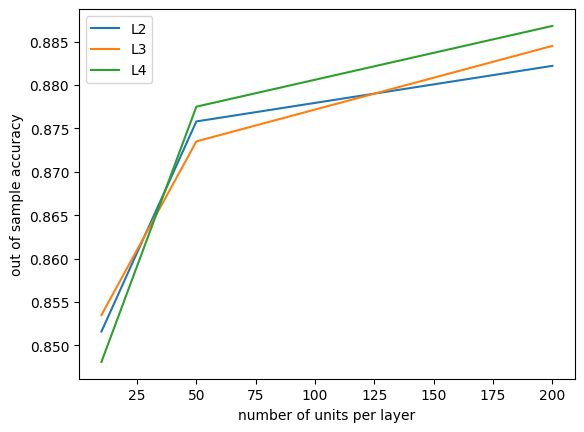

In [25]:
plotResult(result1)


# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    

In [26]:
# More layers and more choices for number of units per layer
result2 = testModel1(x_train, y_train, x_test, y_test, layers = [i for i in range(2, 11)], units = 
                     [10, 50, 200, 250, 500, 750, 1000])


Epoch 1/10
1875/1875 [==============================] - 1s 678us/step - loss: 0.6954 - accuracy: 0.7543
Epoch 2/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.4898 - accuracy: 0.8278
Epoch 3/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.4564 - accuracy: 0.8391
Epoch 4/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.4381 - accuracy: 0.8468
Epoch 5/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.4271 - accuracy: 0.8486
Epoch 6/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.4178 - accuracy: 0.8535
Epoch 7/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.4116 - accuracy: 0.8551
Epoch 8/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.4056 - accuracy: 0.8562
Epoch 9/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.4009 - accuracy: 0.8588
Epoch 10/10
313/313 [==============================] - 0s 493us/

In [27]:
result2

,Loss,Accuracy
2 Layers; 10 Nodes,0.447188,0.8423
2 Layers; 50 Nodes,0.357883,0.8733
2 Layers; 200 Nodes,0.336858,0.8840
2 Layers; 250 Nodes,0.330786,0.8858
2 Layers; 500 Nodes,0.330014,0.8858
...,...,...
10 Layers; 200 Nodes,0.394337,0.8685
10 Layers; 250 Nodes,0.364156,0.8729
10 Layers; 500 Nodes,0.371031,0.8732
10 Layers; 750 Nodes,0.363716,0.8780


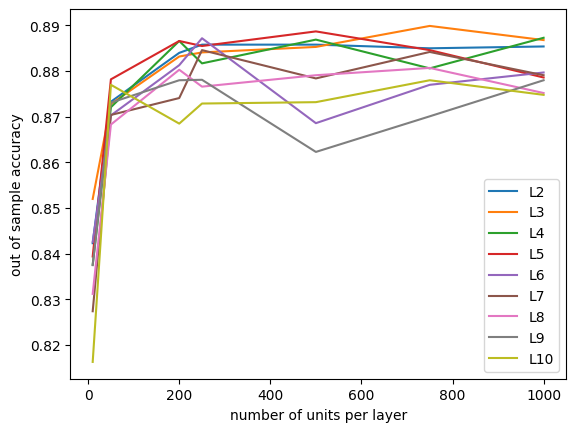

In [28]:
plotResult(result2,  layers=[i for i in range(2, 11)], units=[10, 50, 200, 250, 500, 750, 1000])


In [29]:
# Check our highest accuracy score
max(result2['Accuracy'])

0.8899000287055969

Ok, it seems like this running time the neural network model having 3 layers and 750 units (nodes) for each of these 3 layers resulting in the highest accuracy score (slightly over 89%). In fact, the overall accuracy score slightly decreases in general after 4 layers, and gradually decreases more as the number of layers is close to 10 (and as the number of nodes each layer rises as well), indicating the potential problem of overfitting. *As a result, we pick the neural network model having four layers and 500 nodes (for each layer) as our best choice. We also fix the number of layers to be 2, 3, 4, 5, 6, and 7 for all of our next experiments and vary the number of nodes for each layer among the 2, 3, 4, 5, 6, and 7 layers we just determined to choose.*

In [30]:
# Vary number of units per layer: increase and/or decrease
def testModel2(x_train, y_train, x_test, y_test, layers = [2, 3, 4, 5, 6, 7], units = 150, step = 50,
              increase = True, epochs = 10, opt = 'adam', los = 
             tf.keras.losses.SparseCategoricalCrossentropy(), met = ['accuracy']):
    '''
    testModel2 - evaluate out of sample accuracy for number of layers in 2, 3, 4, 5,
    and for varying number of units per payer in each layer (increasing or decreasing). 
    return the corresponding pd.DataFrame output containing the information of loss and accuracy 
    correspondning to each number of layers
    
    Arguments:
    x_train - the np.array of the training set's features
    y_train - the np.array of the training set's labels
    x_test - the np.array of the evaluation set's features
    y_test - the np.array of the test set's labels
    layers - a list containing the number of layers for each neural network model
    (default: [2, 3, 4, 5, 6, 7])
    units - an integer as a beginning value for the number of units; note that the first layer for
    the first entry is "units + step" instead of the units in the beginning (default: 150)
    step - an integer indicating the step size for each increasing/decreasing number of units each layer
    among the entries in layers (default: 50)
    increase - a boolean type indicator indicating whether use the increasing number of units each layer
    (default) or not (increase = False)
    epochs - epochs, a hyperparamter used in the header layer (default: 10)
    opt - optimizer, a hyperparameter used in the complier for the model in neural network 
    (default: 'adam')
    los - loss, the loss function, another hyperparameter used in the compiler for the model
    (defualt: 'sparse_categorical_crossentropy')
    met - metrics, the other hyperparameter used in the complier for the model to provide a performance 
    criterion to measure the quality of the model's training process (default: 'accuracy')
    
    Return:
    - pd.DataFrame, i.e. the table containing the columns of loss and accuracy, and index of
    each number of layers only
    '''
    loss_lst = []
    accur_lst = []
    
    ## Get our loss and accuracy values for each number of layers and number of nodes per hidden layer
    for layer in layers:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        num_layers = 1
        while num_layers < layer:
            if increase:
                units += step
            else:
                ### Checking whether the nuimber of units after each deacreasing step could be
                ### legally continuously decreased by "step" since the number of units for each 
                ### layer cannot be nonpositive
                if units > step:
                    units -= step
                ### If the number of units is bigger than one, the just simply decrease the number of units
                ### by one (given that it is already not bigger than "step")
                elif units > 1:
                    units -= 1
            model.add(tf.keras.layers.Dense(units, activation='relu'))
            num_layers += 1
                
        model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=opt, loss=los, metrics=met)
        model.fit(x_train, y_train, epochs = epochs)
        loss, accuracy = model.evaluate(x_test, y_test)
        loss_lst.append(loss)
        accur_lst.append(accuracy)
            
    ## Get the final output index's name: number of layers only at this time
    index = []
    for layer in layers:
        i = "{} Layers".format(layer)
        index.append(i)
            
    return pd.DataFrame(np.array([loss_lst, accur_lst]).T, index = index, columns = ['Loss', 'Accuracy'])


In [31]:
result3=testModel2(x_train, y_train, x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.4921 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.3668 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.3300 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.3047 - accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.2870 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.2721 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2616 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2490 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.2397 - accuracy: 0.9107
Epoch 10/10
313/313 [==============================] - 0s 629us/

In [32]:
result3

,Loss,Accuracy
2 Layers,0.335910,0.8834
3 Layers,0.332974,0.8871
4 Layers,0.355372,0.8829
5 Layers,0.350728,0.8844
6 Layers,0.328789,0.8841
7 Layers,0.356384,0.8765


In [33]:
result4=testModel2(x_train, y_train, x_test, y_test, increase=False)

Epoch 1/10
1875/1875 [==============================] - 922s 915us/step - loss: 0.5071 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.3828 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.3453 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.3197 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.3017 - accuracy: 0.8878
Epoch 6/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.2869 - accuracy: 0.8931
Epoch 7/10
1875/1875 [==============================] - 2s 822us/step - loss: 0.2767 - accuracy: 0.8975
Epoch 8/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.2652 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.2553 - accuracy: 0.9053
Epoch 10/10
313/313 [==============================] - 0s 612u

In [34]:
result4

,Loss,Accuracy
2 Layers,0.344030,0.8775
3 Layers,0.362873,0.8730
4 Layers,0.344149,0.8733
5 Layers,0.367258,0.8721
6 Layers,0.362591,0.8698
7 Layers,0.382649,0.8627


In [35]:
result5 = result3=testModel2(x_train, y_train, x_test, y_test, units=300)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4817 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3598 - accuracy: 0.8694
Epoch 3/10
1875/1875 [==============================] - 537s 287ms/step - loss: 0.3233 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3009 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2818 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2560 - accuracy: 0.9047
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2321 - accuracy: 0.9132
Epoch 10/10
313/313 [==============================] - 0s 684us/step - loss: 0

In [36]:
result5

,Loss,Accuracy
2 Layers,0.333069,0.8860
3 Layers,0.331036,0.8882
4 Layers,0.340320,0.8855
5 Layers,0.336717,0.8822
6 Layers,0.334732,0.8824
7 Layers,0.341516,0.8841


In [37]:
result6 = result3=testModel2(x_train, y_train, x_test, y_test, units=300, increase=False)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3616 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3247 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.8886
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2574 - accuracy: 0.9039
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2456 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2341 - accuracy: 0.9114
Epoch 10/10
313/313 [==============================] - 0s 636us/step - loss: 0.352

In [38]:
result6


,Loss,Accuracy
2 Layers,0.352614,0.8778
3 Layers,0.329971,0.8895
4 Layers,0.341274,0.8761
5 Layers,0.353808,0.8753
6 Layers,0.342787,0.8739
7 Layers,0.364919,0.8686


In [39]:
result7 = result3=testModel2(x_train, y_train, x_test, y_test, units=450)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4764 - accuracy: 0.8307
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3564 - accuracy: 0.8702
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3226 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2983 - accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2644 - accuracy: 0.9003
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2538 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2403 - accuracy: 0.9101
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2306 - accuracy: 0.9144
Epoch 10/10
313/313 [==============================] - 0s 758us/step - loss: 0.345

In [40]:
result7

,Loss,Accuracy
2 Layers,0.344968,0.8825
3 Layers,0.338013,0.8852
4 Layers,0.334282,0.8885
5 Layers,0.350419,0.8807
6 Layers,0.331470,0.8844
7 Layers,0.353953,0.8803


In [41]:
result8 = result3=testModel2(x_train, y_train, x_test, y_test, units=450, increase=False)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4775 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3591 - accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3242 - accuracy: 0.8808
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2997 - accuracy: 0.8905
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2808 - accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.8996
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9039
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2431 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2299 - accuracy: 0.9134
Epoch 10/10
313/313 [==============================] - 0s 884us/step - loss: 0.332

In [42]:
result8

,Loss,Accuracy
2 Layers,0.332633,0.8875
3 Layers,0.358922,0.8808
4 Layers,0.323994,0.8876
5 Layers,0.339679,0.8815
6 Layers,0.364063,0.8686
7 Layers,0.367189,0.8708


Note that the majority of the accuracy scores range from 87% to 89%. Next, we will try some interesting experiments: (1) the number of units increases (decreases) first (till the intermediate, or the middle, of the layers) and then decreases (increases) for each number of layers; (2) the number of units increases (decreases) and decreases (increases) shiftly by a constant amount for each number of layers; and (3) the number of units increases (decreases) and decreases (increases) shiftly by a decreasing number pf steps for each number of layers.

In [43]:
# Vary number of units per layer: some patterns for the number of units each layer:
# Increast first (till the middle of the layers) then decrease, or decrease first then increase
def testModel3(x_train, y_train, x_test, y_test, layers = [2, 3, 4, 5, 6, 7], units = 150, step = 50,
              increase_to_decrease = True, epochs = 10, opt = 'adam', los = 
             tf.keras.losses.SparseCategoricalCrossentropy(), met = ['accuracy']):
    '''
    testModel3 - evaluate out of sample accuracy for number of layers in 2, 3, 4, 5,
    and for varying number of units per payer in each layer (increasing first till the inter-
    -mediate layer and then decreasing if  increase_to_decrease = True; 
    decreasing first then increasing otherwise). 
    return the corresponding pd.DataFrame output containing the information of loss and accuracy 
    correspondning to each number of layers 
    
    Arguments:
    x_train - the np.array of the training set's features
    y_train - the np.array of the training set's labels
    x_test - the np.array of the evaluation set's features
    y_test - the np.array of the test set's labels
    layers - a list containing the number of layers for each neural network model 
    (default: [2, 3, 4, 5, 6, 7])
    units - an integer as a beginning value for the number of units
    step - an integer indicating the step size for each increasing/decreasing number of units each layer
    among the entries in layers (default: 50)
    increase_to_decrease - a boolean type indicator indicating whether use the first increasing (till the
    middle of the layers) and then decreasing number of units each layer (increase_to_decrease = 
    True, default) or not (increase_to_decrease = False)
    epochs - epochs, a hyperparamter used in the header layer (default: 10)
    opt - optimizer, a hyperparameter used in the complier for the model in neural network 
    (default: 'adam')
    los - loss, the loss function, another hyperparameter used in the compiler for the model
    (defualt: 'sparse_categorical_crossentropy')
    met - metrics, the other hyperparameter used in the complier for the model to provide a performance 
    criterion to measure the quality of the model's training process (default: 'accuracy')
    
    Return:
    - pd.DataFrame, i.e. the table containing the columns of loss and accuracy, and index of
    each number of layers only
    '''
    loss_lst = []
    accur_lst = []
    
    ## Get our loss and accuracy values for each number of layers and number of nodes per hidden layer
    for layer in layers:
        ### Check out whether we want to increase first and then decrease or not, and then
        ### we create a list "units3" to contain all of the number of units for each layer
        ### We first obtain this by two sublists called "units1" and "units2"
        if increase_to_decrease:
            units1 = [units+i*step for i in range(layer//2)]
            units2 = [units1[-1]-i*step for i in range(layer//2+layer%2)]
        else:
            units1 = [units-i*step for i in range(layer//2)]
            units2 = [units1[-1]+i*step for i in range(layer//2+layer%2)]
            
        units3 = units1 + units2
        ### Note that it is better for us to exclude the last entry of "units3" since we do not 
        ### need it (i.e., we only use one entry for the 2 number of layers, so we always automatically
        ### subtract one element for each number of layers)
        units3 = units3[:-1]
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        num_layers = 1
        ### We create a pointer "index" to access each of the elements (i.e., number of units)
        ### sequentially at each time
        index = 0
        
        while num_layers < layer:
            model.add(tf.keras.layers.Dense(units3[index], activation='relu'))
            num_layers += 1
            index += 1
                
        model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=opt, loss=los, metrics=met)
        model.fit(x_train, y_train, epochs = epochs)
        loss, accuracy = model.evaluate(x_test, y_test)
        loss_lst.append(loss)
        accur_lst.append(accuracy)
            
    # Get the final output index's name: number of layers only at this time
    index = []
    for layer in layers:
        i = "{} Layers".format(layer)
        index.append(i)
            
    return pd.DataFrame(np.array([loss_lst, accur_lst]).T, index = index, columns = ['Loss', 'Accuracy'])


In [44]:
 result9 = testModel3(x_train, y_train, x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.4939 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.3708 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.3347 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.3100 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.2918 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.2775 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.2674 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.2570 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.2464 - accuracy: 0.9083
Epoch 10/10
313/313 [==============================] - 0s 715us/

In [45]:
result9

,Loss,Accuracy
2 Layers,0.345942,0.8812
3 Layers,0.335313,0.8845
4 Layers,0.355356,0.8791
5 Layers,0.337127,0.8842
6 Layers,0.330858,0.8855
7 Layers,0.346492,0.8816


In [46]:
result10 = testModel3(x_train, y_train, x_test, y_test, increase_to_decrease=False)

Epoch 1/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.4932 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.3697 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.3338 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3103 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.2926 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.2780 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.2671 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.2556 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.2449 - accuracy: 0.9090
Epoch 10/10
313/313 [==============================] - 0s 626us/

In [47]:
result10

,Loss,Accuracy
2 Layers,0.359711,0.8743
3 Layers,0.322178,0.8897
4 Layers,0.348990,0.8776
5 Layers,0.325562,0.8836
6 Layers,0.328076,0.8853
7 Layers,0.328753,0.8839


In [48]:
result11 = testModel3(x_train, y_train, x_test, y_test, units = 300)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8311
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3586 - accuracy: 0.8697
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3005 - accuracy: 0.8903
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2823 - accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.8998
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9049
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2446 - accuracy: 0.9092
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2323 - accuracy: 0.9128
Epoch 10/10
313/313 [==============================] - 0s 663us/step - loss: 0.33

In [49]:
result11

,Loss,Accuracy
2 Layers,0.333210,0.8854
3 Layers,0.338199,0.8825
4 Layers,0.335206,0.8854
5 Layers,0.350023,0.8810
6 Layers,0.347402,0.8832
7 Layers,0.347066,0.8777


In [50]:
result12 = testModel3(x_train, y_train, x_test, y_test, units = 300, increase_to_decrease=False)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4810 - accuracy: 0.8298
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3591 - accuracy: 0.8694
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3239 - accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2999 - accuracy: 0.8905
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2819 - accuracy: 0.8950
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9012
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2428 - accuracy: 0.9093
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2309 - accuracy: 0.9140
Epoch 10/10
313/313 [==============================] - 0s 674us/step - loss: 0.336

In [51]:
result12

,Loss,Accuracy
2 Layers,0.336425,0.8853
3 Layers,0.335952,0.8824
4 Layers,0.324655,0.8891
5 Layers,0.352214,0.8825
6 Layers,0.339070,0.8846
7 Layers,0.338510,0.8846


In [52]:
result13 = testModel3(x_train, y_train, x_test, y_test, units = 450)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4759 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3584 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3225 - accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2992 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2802 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2645 - accuracy: 0.9008
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2534 - accuracy: 0.9059
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2405 - accuracy: 0.9104
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2305 - accuracy: 0.9135
Epoch 10/10
313/313 [==============================] - 0s 708us/step - loss: 0.384

In [53]:
result13

,Loss,Accuracy
2 Layers,0.384445,0.8740
3 Layers,0.352090,0.8826
4 Layers,0.343657,0.8852
5 Layers,0.358737,0.8820
6 Layers,0.332979,0.8879
7 Layers,0.368407,0.8752


In [54]:
result14 = testModel3(x_train, y_train, x_test, y_test, units = 450, increase_to_decrease=False)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4760 - accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3561 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3223 - accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2994 - accuracy: 0.8905
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2791 - accuracy: 0.8964
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2646 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2527 - accuracy: 0.9064
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2404 - accuracy: 0.9104
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2306 - accuracy: 0.9128
Epoch 10/10
313/313 [==============================] - 0s 720us/step - loss: 0.339

In [55]:
result14

,Loss,Accuracy
2 Layers,0.338982,0.8856
3 Layers,0.320896,0.8911
4 Layers,0.343515,0.8827
5 Layers,0.328559,0.8862
6 Layers,0.359810,0.8760
7 Layers,0.356462,0.8734


In [56]:
# Vary number of units per layer: some patterns for the number of units each layer:
# Increase (decrease) and then decrease (increase) shiftly by a constant number of steps
def testModel4(x_train, y_train, x_test, y_test, layers = [2, 3, 4, 5, 6, 7], units = 150, step = 50,
              increase_first = True, epochs = 10, opt = 'adam', los = 
             tf.keras.losses.SparseCategoricalCrossentropy(), met = ['accuracy']):
    '''
    testModel4 - evaluate out of sample accuracy for number of layers in 2, 3, 4, 5,
    and for varying number of units per payer in each layer (increasing and then decreasing shiftly 
    by a constant step if increase_first = True;
    decreasing and then increasing shiftly by a constant step otherwise). 
    return the corresponding pd.DataFrame output containing the information of loss and accuracy 
    correspondning to each number of layers 
    
    Arguments:
    x_train - the np.array of the training set's features
    y_train - the np.array of the training set's labels
    x_test - the np.array of the evaluation set's features
    y_test - the np.array of the test set's labels
    layers - a list containing the number of layers for each neural network model 
    (default: [2, 3, 4, 5, 6, 7])
    units - an integer as a beginning value for the number of units
    step - an integer indicating the step size for each increasing/decreasing number of units each layer
    among the entries in layers (default: 50)
    increase_first - a boolean type indicator indicating whether increasing the number of layers first
    (increase_first = True, default) or not (increase_first = False)
    epochs - epochs, a hyperparamter used in the header layer (default: 10)
    opt - optimizer, a hyperparameter used in the complier for the model in neural network 
    (default: 'adam')
    los - loss, the loss function, another hyperparameter used in the compiler for the model
    (defualt: 'sparse_categorical_crossentropy')
    met - metrics, the other hyperparameter used in the complier for the model to provide a performance 
    criterion to measure the quality of the model's training process (default: 'accuracy')
    
    Return:
    - pd.DataFrame, i.e. the table containing the columns of loss and accuracy, and index of
    each number of layers only
    '''
    loss_lst = []
    accur_lst = []
    
    ## Get our loss and accuracy values for each number of layers and number of nodes per hidden layer
    for layer in layers:
        ### Check if we want increasing the number of units first or not
        ### Please note that we set "i=-1" instead of "i=-1" because we start increasing the number of 
        ### units when the number of layers is 3, in which case "i=-i", which is 1
        if increase_first:
            i = -1
        else:
            i = 1
            
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        num_layers = 1
        
        while num_layers < layer:
            #### "units+i*step" guarantees the absolute changes ("step") for each iteration
            #### are constant: "step"
            model.add(tf.keras.layers.Dense(units+i*step, activation='relu'))
            num_layers += 1
            i = -i
            
        model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=opt, loss=los, metrics=met)
        model.fit(x_train, y_train, epochs = epochs)
        loss, accuracy = model.evaluate(x_test, y_test)
        loss_lst.append(loss)
        accur_lst.append(accuracy)
            
    # Get the final output index's name: number of layers only at this time
    index = []
    for layer in layers:
        i = "{} Layers".format(layer)
        index.append(i)
            
    return pd.DataFrame(np.array([loss_lst, accur_lst]).T, index = index, columns = ['Loss', 'Accuracy'])


In [57]:
result15 = testModel4(x_train, y_train, x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.5028 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 2s 816us/step - loss: 0.3775 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.3396 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3168 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.2992 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.2842 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.2744 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.2617 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.2534 - accuracy: 0.9054
Epoch 10/10
313/313 [==============================] - 0s 654us/

In [58]:
result15

,Loss,Accuracy
2 Layers,0.340382,0.8803
3 Layers,0.330372,0.8858
4 Layers,0.335832,0.8810
5 Layers,0.326696,0.8820
6 Layers,0.331956,0.8845
7 Layers,0.346774,0.8807


In [59]:
result16 = testModel4(x_train, y_train, x_test, y_test, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.4861 - accuracy: 0.8279
Epoch 2/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.3628 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.3271 - accuracy: 0.8807
Epoch 4/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.3045 - accuracy: 0.8887
Epoch 5/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.2878 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2715 - accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.2619 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2503 - accuracy: 0.9071
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2395 - accuracy: 0.9105
Epoch 10/10
313/313 [==============================] - 0s 627us/step -

In [60]:
result16

,Loss,Accuracy
2 Layers,0.336260,0.8841
3 Layers,0.323078,0.8899
4 Layers,0.333545,0.8846
5 Layers,0.352351,0.8772
6 Layers,0.351242,0.8746
7 Layers,0.375017,0.8742


In [61]:
result17 = testModel4(x_train, y_train, x_test, y_test, units = 300)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4845 - accuracy: 0.8288
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3623 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.8805
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3027 - accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2692 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9041
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2469 - accuracy: 0.9083
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2375 - accuracy: 0.9109
Epoch 10/10
313/313 [==============================] - 0s 625us/step - loss: 0.321

In [62]:
result17

,Loss,Accuracy
2 Layers,0.321754,0.8912
3 Layers,0.333745,0.8849
4 Layers,0.379812,0.8825
5 Layers,0.328827,0.8836
6 Layers,0.397694,0.8656
7 Layers,0.342172,0.8857


In [63]:
result18 = testModel4(x_train, y_train, x_test, y_test, units = 300, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4793 - accuracy: 0.8292
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3566 - accuracy: 0.8699
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3221 - accuracy: 0.8822
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2982 - accuracy: 0.8911
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2653 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2417 - accuracy: 0.9108
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2319 - accuracy: 0.9140
Epoch 10/10
313/313 [==============================] - 1s 692us/step - loss: 0.336

In [64]:
result18

,Loss,Accuracy
2 Layers,0.336346,0.8849
3 Layers,0.336792,0.8853
4 Layers,0.336617,0.8870
5 Layers,0.325329,0.8872
6 Layers,0.347453,0.8858
7 Layers,0.353649,0.8823


In [65]:
result19 = testModel4(x_train, y_train, x_test, y_test, units = 450)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4779 - accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.8692
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3210 - accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2985 - accuracy: 0.8903
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2799 - accuracy: 0.8963
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2655 - accuracy: 0.9013
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9044
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2424 - accuracy: 0.9093
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2318 - accuracy: 0.9135
Epoch 10/10
313/313 [==============================] - 0s 689us/step - loss: 0.339

In [66]:
result19

,Loss,Accuracy
2 Layers,0.339544,0.8832
3 Layers,0.323390,0.8891
4 Layers,0.330633,0.8845
5 Layers,0.334084,0.8858
6 Layers,0.370990,0.8724
7 Layers,0.336294,0.8832


In [67]:
result20 = testModel4(x_train, y_train, x_test, y_test, units = 450, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4778 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3567 - accuracy: 0.8695
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3223 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2991 - accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2796 - accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2650 - accuracy: 0.9002
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9048
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2421 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2315 - accuracy: 0.9131
Epoch 10/10
313/313 [==============================] - 0s 752us/step - loss: 0.351

In [68]:
result20

,Loss,Accuracy
2 Layers,0.351727,0.8808
3 Layers,0.348255,0.8872
4 Layers,0.346895,0.8844
5 Layers,0.383178,0.8716
6 Layers,0.372535,0.8758
7 Layers,0.333431,0.8830


In [69]:
# Vary number of units per layer: some patterns for the number of units each layer:
# Increase (decrease) and then decrease (increase) shiftly by a decreasing number of steps
def testModel5(x_train, y_train, x_test, y_test, layers = [2, 3, 4, 5, 6, 7], units = 150, step = 50,
              ratio = 0.8, increase_first = True, epochs = 10, opt = 'adam', los = 
             tf.keras.losses.SparseCategoricalCrossentropy(), met = ['accuracy']):
    '''
    testModel5 - evaluate out of sample accuracy for number of layers in 2, 3, 4, 5,
    and for varying number of units per payer in each layer (increasing and then decreasing shiftly 
    by a decreasing step if increase_first = True;
    decreasing and then increasing shiftly by a decreasing step otherwise). 
    return the corresponding pd.DataFrame output containing the information of loss and accuracy 
    correspondning to each number of layers 
    
    Arguments:
    x_train - the np.array of the training set's features
    y_train - the np.array of the training set's labels
    x_test - the np.array of the evaluation set's features
    y_test - the np.array of the test set's labels
    layers - a list containing the number of layers for each neural network model 
    (default: [2, 3, 4, 5, 6, 7])
    units - an integer as a beginning value for the number of units
    step - an integer indicating the step size for each increasing/decreasing number of units each layer
    among the entries in layers (default: 50)
    increase_first - a boolean type indicator indicating whether increasing the number of layers first
    (increase_first = True, default) or not (increase_first = False)
    epochs - epochs, a hyperparamter used in the header layer (default: 10)
    opt - optimizer, a hyperparameter used in the complier for the model in neural network 
    (default: 'adam')
    los - loss, the loss function, another hyperparameter used in the compiler for the model
    (defualt: 'sparse_categorical_crossentropy')
    met - metrics, the other hyperparameter used in the complier for the model to provide a performance 
    criterion to measure the quality of the model's training process (default: 'accuracy')
    
    Return:
    - pd.DataFrame, i.e. the table containing the columns of loss and accuracy, and index of
    each number of layers only
    '''
    loss_lst = []
    accur_lst = []
    unit = units
    
    ## Get our loss and accuracy values for each number of layers and number of nodes per hidden layer
    for layer in layers:
        if increase_first:
            i = 1
        else:
            i = -1
            
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        num_layers = 1
        
        while num_layers < layer:
            model.add(tf.keras.layers.Dense(units, activation='relu'))
            ### The following codes ensure that the number of units will change signs shiftly by
            ### a decreasing step
            units += int(i*step)
            i = -i*ratio
            num_layers += 1
            
        units = unit
        model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer=opt, loss=los, metrics=met)
        model.fit(x_train, y_train, epochs = epochs)
        loss, accuracy = model.evaluate(x_test, y_test)
        loss_lst.append(loss)
        accur_lst.append(accuracy)
            
    ## Get the final output index's name: number of layers only at this time
    index = []
    for layer in layers:
        i = "{} Layers".format(layer)
        index.append(i)
            
    return pd.DataFrame(np.array([loss_lst, accur_lst]).T, index = index, columns = ['Loss', 'Accuracy'])


In [70]:
result21 = testModel5(x_train, y_train, x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.4913 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.3686 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.3314 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.3065 - accuracy: 0.8886
Epoch 5/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.2895 - accuracy: 0.8930
Epoch 6/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.2732 - accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.2645 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.2516 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2418 - accuracy: 0.9100
Epoch 10/10
313/313 [==============================] - 0s 604us/

In [71]:
result21

,Loss,Accuracy
2 Layers,0.416502,0.8616
3 Layers,0.340779,0.8785
4 Layers,0.329768,0.8881
5 Layers,0.322864,0.8858
6 Layers,0.340965,0.8791
7 Layers,0.341341,0.8810


In [72]:
result22 = testModel5(x_train, y_train, x_test, y_test, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.4969 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.3730 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.3109 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.2930 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2776 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.2667 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.2556 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.2448 - accuracy: 0.9093
Epoch 10/10
313/313 [==============================] - 0s 600us/

In [73]:
result22

,Loss,Accuracy
2 Layers,0.327319,0.8857
3 Layers,0.336465,0.8840
4 Layers,0.330257,0.8855
5 Layers,0.330075,0.8807
6 Layers,0.328469,0.8853
7 Layers,0.338506,0.8811


In [74]:
result23 = testModel5(x_train, y_train, x_test, y_test, units = 300)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4807 - accuracy: 0.8309
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3594 - accuracy: 0.8691
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3238 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2995 - accuracy: 0.8903
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2815 - accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2654 - accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2569 - accuracy: 0.9044
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9090
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2339 - accuracy: 0.9120
Epoch 10/10
313/313 [==============================] - 0s 669us/step - loss: 0.336

In [75]:
result23

,Loss,Accuracy
2 Layers,0.336626,0.8851
3 Layers,0.329542,0.8883
4 Layers,0.336756,0.8812
5 Layers,0.325235,0.8880
6 Layers,0.346831,0.8834
7 Layers,0.349732,0.8837


In [76]:
result24 = testModel5(x_train, y_train, x_test, y_test, units = 300, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4850 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3624 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3262 - accuracy: 0.8807
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3017 - accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2689 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2579 - accuracy: 0.9038
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2445 - accuracy: 0.9092
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2356 - accuracy: 0.9129
Epoch 10/10
313/313 [==============================] - 0s 689us/step - loss: 0.328

In [77]:
result24

,Loss,Accuracy
2 Layers,0.328315,0.8861
3 Layers,0.364080,0.8773
4 Layers,0.331968,0.8864
5 Layers,0.336607,0.8848
6 Layers,0.335782,0.8822
7 Layers,0.348105,0.8808


In [78]:
result25 = testModel5(x_train, y_train, x_test, y_test, units = 450)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4782 - accuracy: 0.8315
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3583 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3228 - accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2992 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2823 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2639 - accuracy: 0.9003
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2536 - accuracy: 0.9044
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2417 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2314 - accuracy: 0.9133
Epoch 10/10
313/313 [==============================] - 0s 832us/step - loss: 0.339

In [79]:
result25

,Loss,Accuracy
2 Layers,0.339398,0.8843
3 Layers,0.351138,0.8818
4 Layers,0.343218,0.8863
5 Layers,0.333784,0.8854
6 Layers,0.349061,0.8833
7 Layers,0.327972,0.8856


In [80]:
result26 = testModel5(x_train, y_train, x_test, y_test, units = 450, increase_first = False)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4756 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3573 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3225 - accuracy: 0.8814
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2993 - accuracy: 0.8908
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2799 - accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2540 - accuracy: 0.9056
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2419 - accuracy: 0.9094
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2314 - accuracy: 0.9134
Epoch 10/10
313/313 [==============================] - 0s 768us/step - loss: 0.348

In [81]:
result26

,Loss,Accuracy
2 Layers,0.348545,0.8826
3 Layers,0.338547,0.8858
4 Layers,0.354720,0.8826
5 Layers,0.338367,0.8836
6 Layers,0.353949,0.8789
7 Layers,0.362918,0.8756


In fact, after long periods of running for all of the code cells several times, the majority of all such models achieve the accuracy between 87% and 89% approximately. And the best model changes each time. However, the overfitting issue almost always applies for the large number of layers (i.e., 6, 7, 8, 9, and 10 layers). So, for simplicity, I just pick up the constant number of 500 nodes for each layer in the case of 4 layers, as it achieves the highest performance more than one time for my previous experiment.

In [83]:
best_mod = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

best_mod.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

best_mod.fit(x_train, y_train, epochs = 10)
loss, accuracy = best_mod.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4761 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3294 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3049 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2843 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2487 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2387 - accuracy: 0.9104
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3329 

Here is the cell **that must appear as the last cell in your notebook**

In [85]:
import os
from tensorflow.keras.models import load_model

modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)   

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(x_test, y_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = model.predict(x_test)
    
    return predictions

# Assign to variable my_model the model that solves task 3.2
my_model = best_mod # CHANGE None to your model !

saveModel(my_model, model_path)
predicts = MyModel(x_test, y_test, model_path)

Directory ./assignment7_best_model already exists, files will be over-written.
Model saved in directory ./assignment7_best_model; create an archive of this directory and submit with your assignment.
313/313 [==============================] - 0s 1ms/step
